#Librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix            # matriz de confusión
from sklearn.metrics import classification_report       # evaluación  Accuracy/Precision/Recall/F1 Score
from sklearn.metrics import ConfusionMatrixDisplay      # matriz de confusión para mapa de calor

#Validación cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Descarga de Datos

In [2]:
# Cargar los datos desde el archivo CSV
# data = pd.read_csv('datos.csv')
data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/AgglomerativeClustering_withclusters.csv', delimiter=';')

In [3]:
data

,V_media,SA_media,SI_media,SP_media,SF_media,CL_media,CH_media,CE_media,CB_media,CD_media,...,EQUIPO_rflidbinih,EDAD_ijawrgtfuz,EDAD_omygfsbzgq,EDAD_pqgwhrmfdu,EDAD_qmsudmubli,EDAD_vjekcogdhn,GENERO_Femenino,GENERO_Masculino,GENERO_No binario,Cluster
0,4.333333,5.000000,4.666667,3.000000,4.000000,5.000000,4.000000,4.333333,3.666667,5.000000,...,0,0,0,1,0,0,0,1,0,1
1,4.000000,5.000000,5.000000,2.000000,4.666667,5.000000,5.333333,6.000000,4.333333,4.000000,...,0,0,0,1,0,0,0,1,0,1
2,4.666667,4.000000,4.666667,3.000000,4.333333,5.000000,5.000000,5.000000,3.333333,2.333333,...,0,0,1,0,0,0,1,0,0,1
3,5.000000,5.000000,5.000000,4.000000,4.000000,4.666667,4.666667,4.666667,4.666667,3.666667,...,0,0,0,1,0,0,0,1,0,4
4,2.000000,1.000000,4.666667,1.000000,1.000000,1.000000,1.333333,2.000000,4.000000,5.000000,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,4.000000,4.666667,3.333333,2.000000,2.000000,5.000000,4.000000,4.333333,3.000000,2.333333,...,0,0,0,0,1,0,0,0,0,4
129,3.000000,4.333333,4.333333,1.333333,2.000000,4.666667,2.000000,3.333333,3.333333,4.333333,...,0,0,0,0,1,0,0,0,0,0
130,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.666667,3.000000,3.666667,3.000000,3.000000,...,0,0,0,0,1,0,0,0,0,5
131,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,0,0,0,0,1,0,0,0,0,1


In [4]:
# Dividir los datos en características (X) y etiquetas (y)
X = data.drop('Cluster', axis=1)  # nombre de la columna objetivo, en este caso AREA
y = data['Cluster']

etiquetas=np.unique(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creación del Modelo (sin validación cruzada)



In [ ]:
# Crear el modelo SVM
modelAdaBoost = AdaBoostClassifier(n_estimators=500,learning_rate=2,  algorithm="SAMME")

In [ ]:
# Entrenar el modelo
history = modelAdaBoost.fit(X_train, y_train)

## Predicciones y resultados

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelAdaBoost.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.9259259259259259


In [ ]:
y_test

51     1
69     1
31     4
42     1
117    4
77     0
127    4
56     1
40     1
12     7
81     0
26     1
108    0
100    0
66     1
83     0
4      0
27     0
19     1
123    4
36     1
16     1
18     1
10     1
65     1
44     1
11     7
Name: Cluster, dtype: int64

In [ ]:
# Resultados
resultados = modelAdaBoost.predict(X_test)
resultados_maximos = []
#for i in resultados:
#  resultados_maximos.append(np.where(i==i.max()))
#  resultados_maximos= [int(tupla[0]) for tupla in resultados_maximos]

# Generación del informe de clasificación
print("\n", classification_report(y_pred,y_test, zero_division=True))


               precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.93      1.00      0.96        13
           4       1.00      0.67      0.80         6
           7       1.00      1.00      1.00         2

    accuracy                           0.93        27
   macro avg       0.95      0.92      0.92        27
weighted avg       0.93      0.93      0.92        27



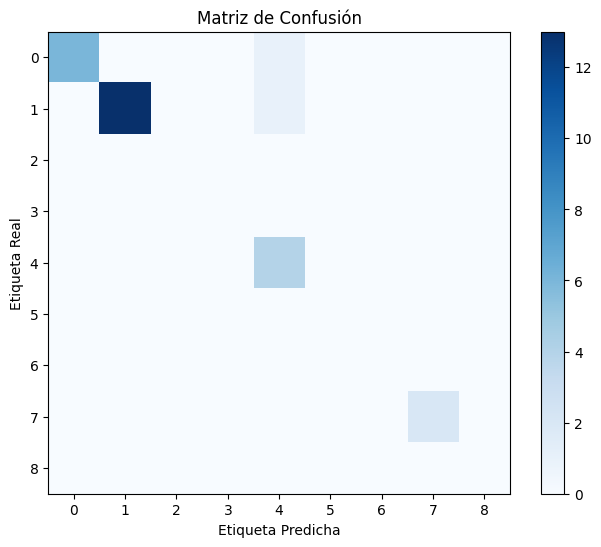

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=etiquetas)
# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
#classes = ['GENERO_Femenino', 'GENERO_Masculino']  # Ajustar las etiquetas de clase según los datos
#tick_marks = np.arange(len(classes))
#plt.xticks(tick_marks, classes)
#plt.yticks(tick_marks, classes)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()


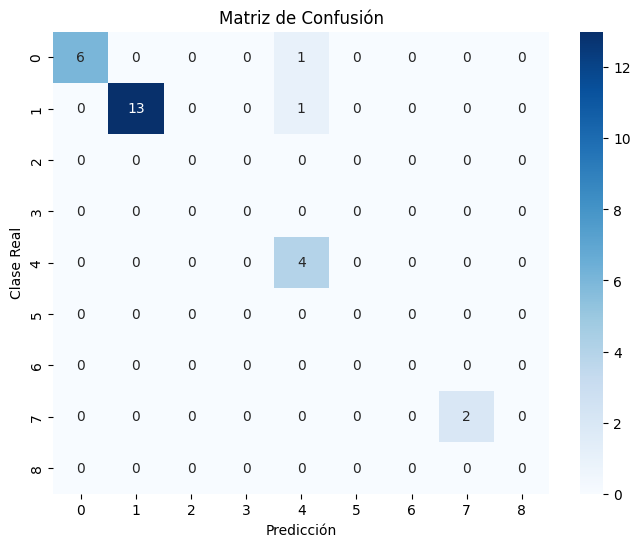

In [ ]:
# Crear el heatmap de la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=cm, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.title("Matriz de Confusión")
plt.show()

###Hay que tener en cuenta que al interpretar el F1-score en conjuntos de datos pequeños, es el caso,, es importante considerar el contexto y tener en cuenta otras métricas y factores relevantes. Además, es recomendable utilizar técnicas de validación cruzada o remuestreo adecuadas para asegurarse de que la evaluación sea robusta y representativa del desempeño general del modelo.

## Creación del Modelo (con validación cruzada)

In [5]:
# Definir el número de folds
k = 5

# Crear un objeto de validación cruzada k-fold
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

In [6]:
# Crear una instancia de tu modelo
model = AdaBoostClassifier()  # Utilizamos directamente AdaBoostClassifier como el modelo

In [7]:
# Realizar validación cruzada
scores = cross_val_score(model, X, y, cv=kfold, scoring='f1_macro')

# Imprimir los resultados de cada fold
for i, score in enumerate(scores):
    print(f"F1-score en el fold {i+1}: {score}")

# Imprimir el promedio y la desviación estándar de los resultados
print(f"Promedio del F1-score: {scores.mean()}")
print(f"Desviación estándar del F1-score: {scores.std()}")

F1-score en el fold 1: 0.4367365967365967
F1-score en el fold 2: 0.6132756132756132
F1-score en el fold 3: 0.2857142857142857
F1-score en el fold 4: 0.5066666666666666
F1-score en el fold 5: 0.5469399881164586
Promedio del F1-score: 0.4778666301019242
Desviación estándar del F1-score: 0.11184843916297223
